<a href="https://colab.research.google.com/github/Timofeychick/CS_SEMINARS/blob/main/Applications_SVD_decompositions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Уменьшение размерности данных:

In [ ]:
import numpy as np

In [ ]:
# Создание случайной матрицы
data = np.random.rand(5, 3)

In [ ]:
data

array([[0.70473545, 0.67041114, 0.63541328],
       [0.88264445, 0.93877679, 0.30073526],
       [0.99432275, 0.08175687, 0.0213202 ],
       [0.35097064, 0.86800386, 0.01661777],
       [0.9662346 , 0.35704868, 0.20540591]])

In [ ]:
# SVD разложение
U, S, VT = np.linalg.svd(data)

In [ ]:
# Выбор первых двух компонент
n_components = 2
reduced_data = np.dot(U[:, :n_components], np.diag(S[:n_components]))

In [ ]:
reduced_data

array([[-1.09755168,  0.14819708],
       [-1.30679746,  0.19857755],
       [-0.81519953, -0.56285667],
       [-0.78534336,  0.44423632],
       [-1.00314371, -0.31121377]])

#2. Рекомендательные системы:

In [ ]:
# Пример данных (пользователи x фильмы)
data = np.array([
    [5, 4, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

In [ ]:
# SVD разложение
U, S, VT = np.linalg.svd(data)

In [ ]:
# Представление пользователей и фильмов в пространстве с меньшим количеством компонент
n_components = 2
user_feature = np.dot(U[:, :n_components], np.diag(S[:n_components]))
film_feature = np.dot(np.diag(S[:n_components]), VT[:n_components, :])

In [ ]:
# Поиск рекомендаций для нового пользователя
new_user = np.array([0, 0, 5, 4])  # Предпочтения нового пользователя
new_user_representation = np.dot(np.dot(new_user, VT.T), np.linalg.inv(np.diag(S)))

In [ ]:
# Рекомендации для нового пользователя на основе SVD
recommendations = np.dot(new_user_representation, VT)

In [ ]:
recommendations

array([ 0.06551737, -0.26174463,  0.97821819,  0.34436816])

#3. Сжатие изображений:

In [ ]:
import matplotlib.pyplot as plt
from scipy import misc

In [ ]:
# Загрузка изображения
image = misc.face(gray=True)

<ipython-input-14-5f588eba6e4b>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face(gray=True)


In [ ]:
# SVD разложение
U, S, VT = np.linalg.svd(image)

In [ ]:
# Выбор количества компонент для сжатия
n_components = 50
compressed = np.dot(U[:, :n_components], np.dot(np.diag(S[:n_components]), VT[:n_components, :]))

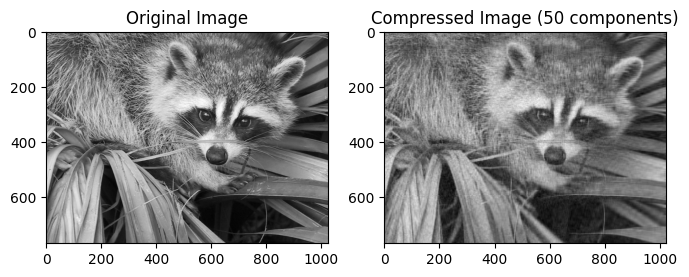

In [ ]:
# Отображение изображения до и после сжатия
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed, cmap='gray')
plt.title(f'Compressed Image ({n_components} components)')
plt.show()